In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

## 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 數據內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Trouser


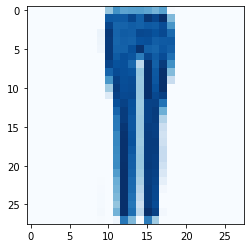

In [8]:
n = 19743
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Blues');

## 整理資料

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000, 784)

In [0]:
x_test = x_test.reshape(10000, 784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

## 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(87, input_dim=784, activation='relu'))

In [0]:
model.add(Dense(87, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

## 組裝神經網路

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


## 訓練

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0706 - accuracy: 0.4689
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.7021
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0361 - accuracy: 0.7579
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0321 - accuracy: 0.7887
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0296 - accuracy: 0.8048
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0279 - accuracy: 0.8155
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0267 - accuracy: 0.8226
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0258 - accuracy: 0.8281
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0251 - accuracy: 0.8319
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0245 - accuracy: 0.8361

## 成果

In [24]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


神經網路預測是: Shirt


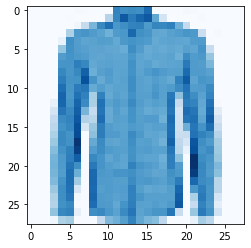

In [32]:
n = 2825

print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Blues')